# Fractal Dimension

This notebooks runs fractal dimension measures on time series signals. 

This notebook covers fractal dimension and related measures, including:
- Correlation Dimension
- Higuchi Fractal Dimension
- Petrosian Fractal Dimension
- Katz Fractal Dimension

In [1]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from neurodsp.aperiodic.conversions import convert_exponent_hfd

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims, run_sims_load
from apm.methods import correlation_dimension, higuchi_fd, petrosian_fd, katz_fd
from apm.methods.settings import CD_PARAMS, HFD_PARAMS, KFD_PARAMS, PFD_PARAMS
from apm.plts.sims import plot_sims, plot_ap_sims, plot_pe_sims
from apm.plts.settings import EXT, COLORS
from apm.sim.settings import (N_SIMS, N_SIMS2, EXP, EXPS, KNEES, FREQS, POWERS, BWS,
                              SIM_PARAMS_AP, SIM_PARAMS_COMB, SIM_PARAMS_KNEE)
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Set the random seed
set_random_seed(111)

In [5]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / '23_fractaldim'

In [6]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

## Correlation Dimension

The correlation dimension is a measure of the dimensionality of the space of a set of points, which is considered to be a type of fractal dimension.

In [7]:
# Check correlation dimension measure parameters
print(CD_PARAMS)

{'delay': 4, 'dimension': 20}


### Calculate Correlation Dimension on Example Signals

In [8]:
# Check correlation dimension measures on example signals
print('Correlation dimension:')
print('  powerlaw: \t {:1.4f}'.format(correlation_dimension(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(correlation_dimension(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(correlation_dimension(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(correlation_dimension(SIG_KN)))

Correlation dimension:
  powerlaw: 	 0.8602
  osc:      	 0.8166
  combined: 	 0.9822
  knee:     	 1.2910


### Correlation Dimension: Aperiodic Measures

In [9]:
# Run simulations calculating correlation dimension across exponents
cd_sims_exp = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, correlation_dimension, CD_PARAMS, 'update_exp', EXPS, N_SIMS2)

In [10]:
# Run simulations calculating correlation dimension across exponents with an oscillation
cd_sims_comb = run_sims(\
    sim_combined, SIM_PARAMS_COMB, correlation_dimension, CD_PARAMS, 'update_comb_exp', EXPS, N_SIMS2)

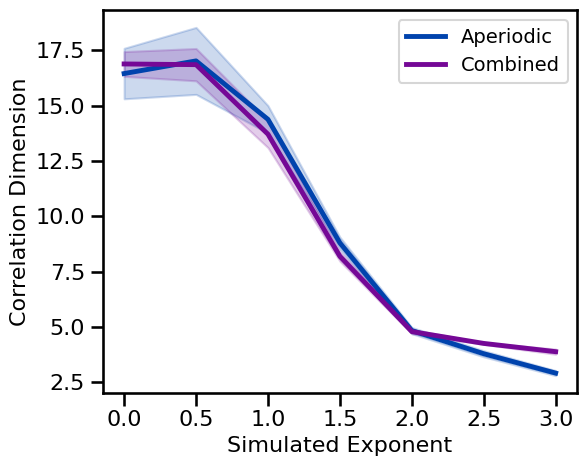

In [11]:
# Plot correlation dimension estimates across aperiodic variations
plot_ap_sims(cd_sims_exp, cd_sims_comb, 'Correlation Dimension',
             save_fig=SAVE_FIG, file_name='cd_ap' + EXT, file_path=FIGPATH)

### Correlation Dimension: Periodic Variations

In [12]:
# Run simulations calculating correlation dimension across oscillation frequency
cd_sims_freq = run_sims(\
    sim_combined, SIM_PARAMS_COMB, correlation_dimension, CD_PARAMS, 'update_freq', FREQS, N_SIMS2)

KeyboardInterrupt: 

In [ ]:
# Run simulations calculating correlation dimension across oscillation power
cd_sims_pow = run_sims(\
    sim_combined, SIM_PARAMS_COMB, correlation_dimension, CD_PARAMS, 'update_pow', POWERS, N_SIMS2)

In [ ]:
# Plot correlation dimension estimates across periodic variations
plot_pe_sims(cd_sims_freq, cd_sims_pow, 'Correlation Dimension', 
             save_fig=SAVE_FIG, file_name='cd_pe' + EXT, file_path=FIGPATH)

### Correlation Dimension: Knee Variations

In [ ]:
# Run simulations calculating correlation dimension across timescales
cd_sims_knee = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, correlation_dimension, CD_PARAMS, 'update_knee', KNEES, N_SIMS2)

In [ ]:
# Plot correlationl dimension across different timescales
plot_sims(KNEES, cd_sims_knee, 'Timescale', 'Correlation Dimension', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='cd_knee' + EXT, file_path=FIGPATH)

### Correlation Dimension: Peak Variations

In [ ]:
# Run simulations calculating correlation dimension across peak bandwidths (sims from file)
cd_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', correlation_dimension, CD_PARAMS, N_SIMS2)

In [ ]:
# Plot correlation dimension across peak bandwidth
plot_sims(BWS, cd_sims_bw, 'Bandwidth', 'Correlation Dimension', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='cd_bw' + EXT, file_path=FIGPATH)

## Fractal Dimension Measures

Fractal dimension measures are measures of the roughness, or complexity, of a shape.

In [ ]:
# Check Fractal Dimension measure parameters
print(HFD_PARAMS)
print(KFD_PARAMS)
print(PFD_PARAMS)

### Calculate Fractal Dimension on Example Signals

Calculate measures of fractal dimension on time series. 

In [ ]:
# Check Higuchi fractal dimension measures on example signals
print('Higuchi fractal dimension:')
print('  powerlaw: \t {:1.4f} \t {:1.2f}'.format(higuchi_fd(SIG_AP), convert_exponent_hfd(EXP)))
print('  osc:      \t {:1.4f}'.format(higuchi_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(higuchi_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(higuchi_fd(SIG_KN)))

In [ ]:
# Check Katz fractal dimension measures on example signals
print('Katz fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(katz_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(katz_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(katz_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(katz_fd(SIG_KN)))

In [ ]:
# Check Petrosian fractal dimension measures on example signals
print('Petrosian fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(petrosian_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(petrosian_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(petrosian_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(petrosian_fd(SIG_KN)))

### Fractal Dimension: Aperiodic Variations

In [ ]:
# Calculate the expected Higuchi fractal dimension value for each powerlaw exponent
exps_for_expected = [val for val in EXPS if val != -0.5]
expected_hfd = [convert_exponent_hfd(exp) for exp in exps_for_expected]
expected_hfd.insert(5, None)

In [ ]:
# Run simulations calculating fractal dimension across exponents
hfd_sims_exp = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, higuchi_fd, HFD_PARAMS, 'update_exp', EXPS, N_SIMS)
kfd_sims_exp = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, katz_fd, KFD_PARAMS, 'update_exp', EXPS, N_SIMS)
pfd_sims_exp = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, petrosian_fd, PFD_PARAMS, 'update_exp', EXPS, N_SIMS)

In [ ]:
# Run simulations calculating fractal dimension across exponents with an oscillation
hfd_sims_comb = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, HFD_PARAMS, 'update_comb_exp', EXPS, N_SIMS)
kfd_sims_comb = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, KFD_PARAMS, 'update_comb_exp', EXPS, N_SIMS)
pfd_sims_comb = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, PFD_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

In [ ]:
# Plot Higuchi fractal dimension estimates across aperiodic variations
plot_ap_sims(hfd_sims_exp, hfd_sims_comb, 'Higuchi Fractal Dimension', expected=expected_hfd,
             save_fig=SAVE_FIG, file_name='hfd_ap' + EXT, file_path=FIGPATH)

In [ ]:
# Plot Katz fractal dimension estimates across aperiodic variations
plot_ap_sims(kfd_sims_exp, kfd_sims_comb, 'Katz Fractal Dimension',
             save_fig=SAVE_FIG, file_name='kfd_ap' + EXT, file_path=FIGPATH)

In [ ]:
# Plot Petrosian fractal dimension estimates across aperiodic variations
plot_ap_sims(pfd_sims_exp, pfd_sims_comb, 'Petrosian Fractal Dimension',
             save_fig=SAVE_FIG, file_name='pfd_ap' + EXT, file_path=FIGPATH)

### Fractal Dimension: Periodic Variations

In [ ]:
# Run simulations calculating fractal dimension across oscillation frequency
hfd_sims_freq = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, HFD_PARAMS, 'update_freq', FREQS, N_SIMS)
kfd_sims_freq = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, KFD_PARAMS, 'update_freq', FREQS, N_SIMS)
pfd_sims_freq = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, PFD_PARAMS, 'update_freq', FREQS, N_SIMS)

In [ ]:
# Run simulations calculating fractal dimension across oscillation power
hfd_sims_pow = run_sims(\
    sim_combined, SIM_PARAMS_COMB, higuchi_fd, HFD_PARAMS, 'update_pow', POWERS, N_SIMS)
kfd_sims_pow = run_sims(\
    sim_combined, SIM_PARAMS_COMB, katz_fd, KFD_PARAMS, 'update_pow', POWERS, N_SIMS)
pfd_sims_pow = run_sims(\
    sim_combined, SIM_PARAMS_COMB, petrosian_fd, PFD_PARAMS, 'update_pow', POWERS, N_SIMS)

In [ ]:
# Plot Higuchi fractal dimension estimates across periodic variations
plot_pe_sims(hfd_sims_freq, hfd_sims_pow, 'Highuchi Fractal Dimension',
             save_fig=SAVE_FIG, file_name='hfd_pe' + EXT, file_path=FIGPATH)

In [ ]:
# Plot Katz fractal dimension estimates across periodic variations
plot_pe_sims(kfd_sims_freq, kfd_sims_pow, 'Katz Fractal Dimension', 
             save_fig=SAVE_FIG, file_name='kfd_pe' + EXT, file_path=FIGPATH)

In [ ]:
# Plot Petrosian fractal dimension estimates across periodic variations
plot_pe_sims(pfd_sims_freq, pfd_sims_pow, 'Petrosian Fractal Dimension', 
             save_fig=SAVE_FIG, file_name='pfd_pe' + EXT, file_path=FIGPATH)

### Fractal Dimension: Knee Variations

In [ ]:
# Run simulations calculating fractal dimension across timescales
hfd_sims_knee = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, higuchi_fd, HFD_PARAMS, 'update_knee', KNEES, N_SIMS)
kfd_sims_knee = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, katz_fd, KFD_PARAMS, 'update_knee', KNEES, N_SIMS)
pfd_sims_knee = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, petrosian_fd, PFD_PARAMS, 'update_knee', KNEES, N_SIMS)

In [ ]:
# Plot Higuchi fractal dimension across different timescales
plot_sims(KNEES, hfd_sims_knee, 'Timescale', 'Highuchi Fractal Dimension', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='hfd_knee' + EXT, file_path=FIGPATH)

In [ ]:
# Plot Katz fractal dimension across different timescales
plot_sims(KNEES, kfd_sims_knee, 'Timescale', 'Katz Fractal Dimension', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='kfd_knee' + EXT, file_path=FIGPATH)

In [ ]:
# Plot Petrosian fractal dimension across different timescales
plot_sims(KNEES, pfd_sims_knee, 'Timescale', 'Petrosian Fractal Dimension', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='pfd_knee' + EXT, file_path=FIGPATH)

### Fractal Dimension: Peak Variations

In [ ]:
# Run simulations calculating fractal dimension across peak bandwidths (sims from file)
hfd_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', higuchi_fd, HFD_PARAMS)
kfd_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', katz_fd, KFD_PARAMS)
pfd_sims_bw = run_sims_load(SIMPATH / 'ts_sims_comb_bw', petrosian_fd, PFD_PARAMS)

In [ ]:
# Plot Higuchi fractal dimension across peak bandwidth
plot_sims(BWS, hfd_sims_bw, 'Bandwidth', 'Highuchi Fractal Dimension', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='hfd_bw' + EXT, file_path=FIGPATH)

In [ ]:
# Plot Katz fractal dimension across peak bandwidth
plot_sims(BWS, kfd_sims_bw, 'Bandwidth', 'Katz Fractal Dimension', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='kfd_bw' + EXT, file_path=FIGPATH)

In [ ]:
# Plot Petrosian fractal dimension across peak bandwidth
plot_sims(BWS, pfd_sims_bw, 'Bandwidth', 'Petrosian Fractal Dimension', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='pfd_bw' + EXT, file_path=FIGPATH)

## Conclusions

Overall, we can see the following patterns in these simulations:

Fractal dimension measures (general patterns, across all measures):
- increase with decreasing aperiodic exponent, non-linearly
- decreases with increasing oscillations frequency or power, mixed patterns